# **CSE** **B10**-**221710310017**-**GAJJALA** **MAANSI**

## **Project** **Title** - **PREDICT** **THE** **FORESTFIRES**

### **Problem** **Statement**:

### Aim: The aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data 

#### This is a regression problem with clear outliers which cannot be predicted using any reasonable method. A comparision of the three methods has been done :


(a) Random Forest Regressor,


(b) Neural Network, 


(c) Linear Regression

### **Data Collection:** 

- The data is a CSV file

The data is acquired from the following link:
    
- https://archive.ics.uci.edu/ml/datasets/forest+fires
    
Description of the data:
    
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

##### **Importing** **required** **packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##### **Reading** **the** **dataset**

In [2]:
data = pd.read_csv("/content/drive/My Drive/Summer Internship Project /Predict the ForestFires/forestfires.csv")
data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [3]:
data.shape

(517, 13)

In [4]:
data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
print(len(data.select_dtypes(include=['object']).columns))
print(len(data.select_dtypes(include=['int64','float64']).columns))
print(len(data.select_dtypes(include=['bool']).columns))

2
11
0


In [6]:
data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [8]:
data.isnull().sum()   ### checking null values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [10]:
data.nunique()   ### checking unique values

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [11]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [12]:
data.describe(include=['object'])

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


##### **Missing** **values**

In [13]:
data.isna().sum()    ### checking missing values

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [14]:
import missingno as msno

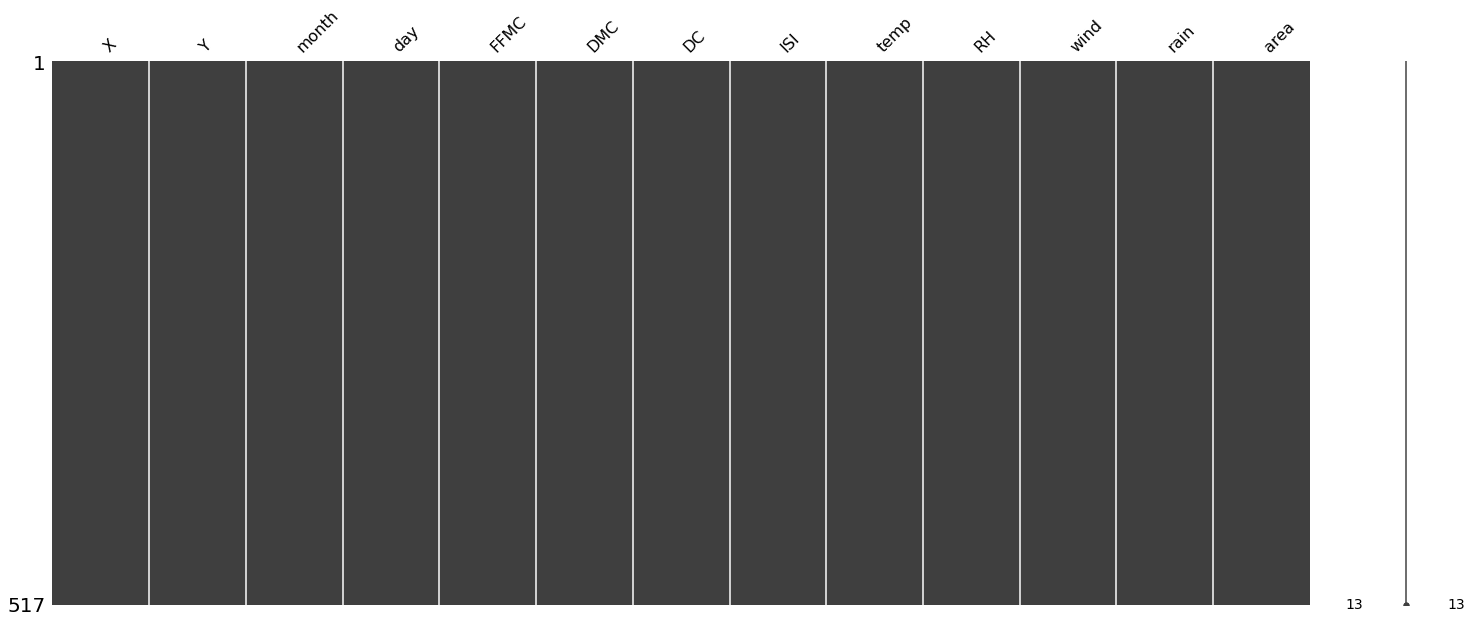

In [15]:
msno.matrix(data)

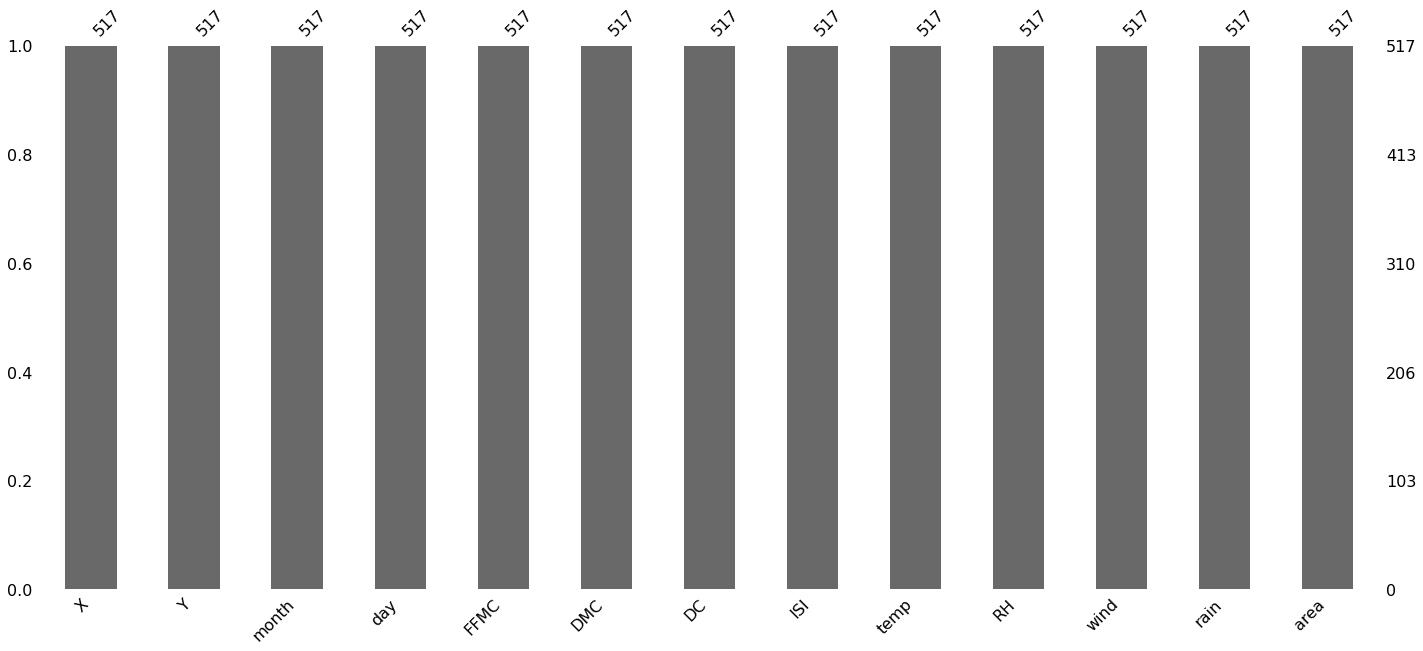

In [16]:
msno.bar(data)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2c9afbea20>,
      dtype=object)

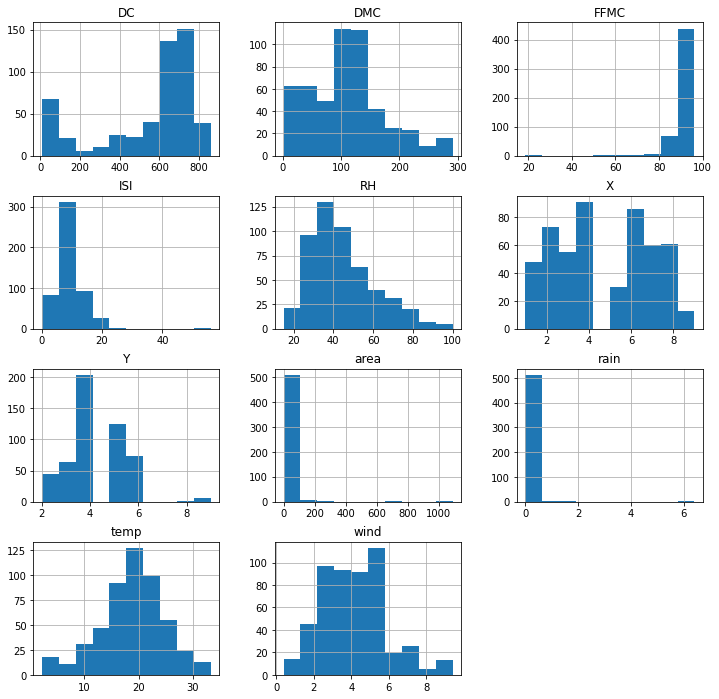

In [17]:
data.hist(figsize=(12,12))

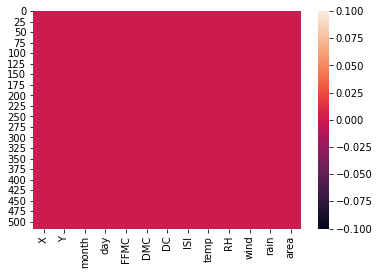

In [18]:
# Visualizing the missing values with heatmap
sns.heatmap(data.isna())

**Data Visualization**

#### Plot scatterplots and distributions of numerical features to see how they may affect the output 'area'
For this, first we need to transform the outcome 'area' by taking its logarithm (after adding 1 to avoid zeros)

$$\text{Log-area} = log_{10}(area+1)$$

In [19]:
data['Log-area']=np.log10(data['area']+1)

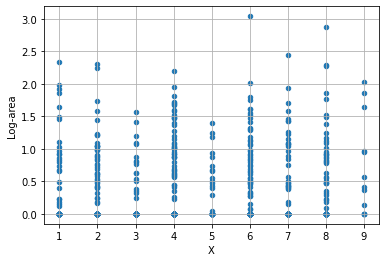

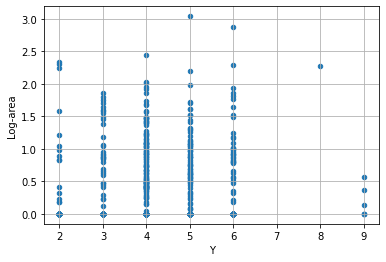

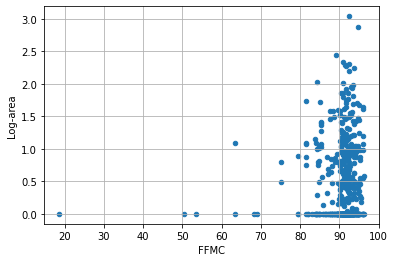

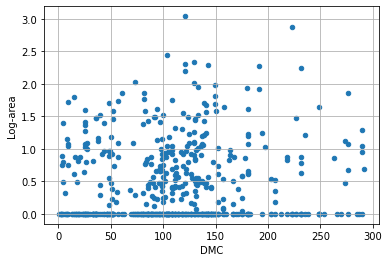

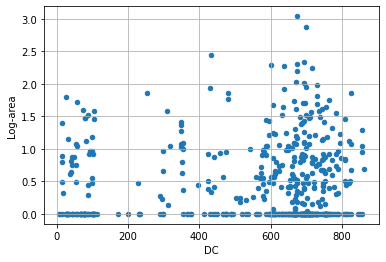

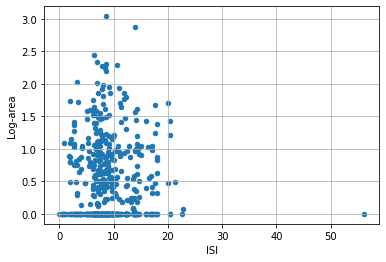

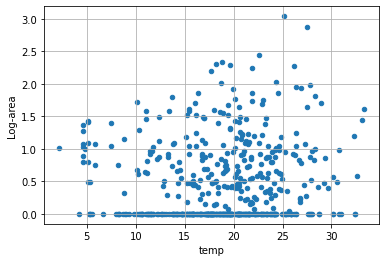

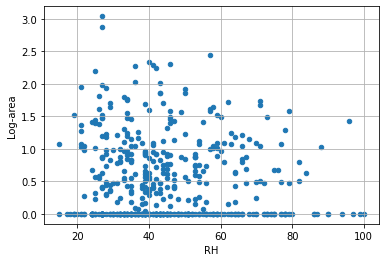

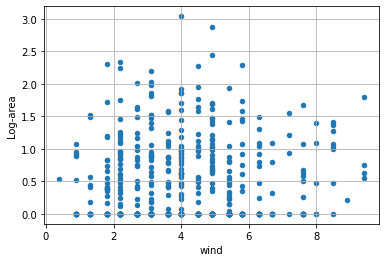

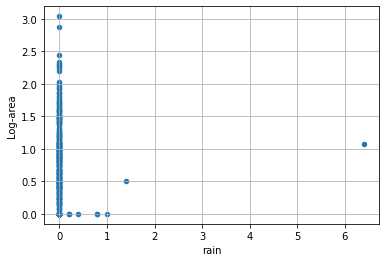

In [20]:
for i in data.describe().columns[:-2]:
    data.plot.scatter(i,'Log-area',grid=True)

##### Plot boxplots of how the categorical features (month and day) affect the outcome


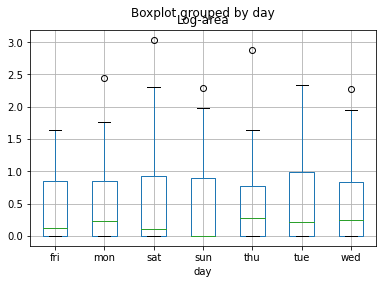

In [21]:
data.boxplot(column='Log-area',by='day')

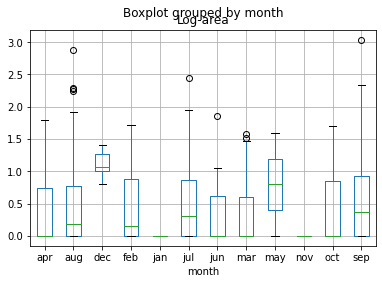

In [22]:
data.boxplot(column='Log-area',by='month')

[Text(0, 0, 'X'),
 Text(0, 0, 'Y'),
 Text(0, 0, 'month'),
 Text(0, 0, 'day'),
 Text(0, 0, 'FFMC'),
 Text(0, 0, 'DMC'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'ISI'),
 Text(0, 0, 'temp'),
 Text(0, 0, 'RH'),
 Text(0, 0, 'wind'),
 Text(0, 0, 'rain'),
 Text(0, 0, 'area')]

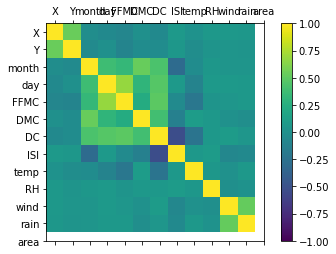

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)

##### Encoding Categorial Data

In [24]:
data['month']

0      mar
1      oct
2      oct
3      mar
4      mar
      ... 
512    aug
513    aug
514    aug
515    aug
516    nov
Name: month, Length: 517, dtype: object

In [25]:
## Covert the categorical data into numerical columns using get_dummies
dummy_set = pd.get_dummies(data.month)
dummy_set  

,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,0,1,0,0,0,0,0,0,0,0,0,0
513,0,1,0,0,0,0,0,0,0,0,0,0
514,0,1,0,0,0,0,0,0,0,0,0,0
515,0,1,0,0,0,0,0,0,0,0,0,0


In [26]:
data['day']

0      fri
1      tue
2      sat
3      fri
4      sun
      ... 
512    sun
513    sun
514    sun
515    sat
516    tue
Name: day, Length: 517, dtype: object

In [27]:
dummy_set1 = pd.get_dummies(data.day)
dummy_set1 

,fri,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
512,0,0,0,1,0,0,0
513,0,0,0,1,0,0,0
514,0,0,0,1,0,0,0
515,0,0,1,0,0,0,0


In [28]:
# Concatenating the original dataframe and dataframe of dummy columns
merged_data = pd.concat([data, dummy_set, dummy_set1 ], axis=1)
merged_data

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,apr,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep,fri,mon,sat,sun,thu,tue,wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.871573,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.742647,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.084934,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [29]:
# Creating dummy columns and dropping the dummy column
pd.get_dummies(data, columns=['month','day'], drop_first=True)

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0.000000,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0.871573,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1.742647,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1.084934,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


##### Label encoder for the categorical feature 


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [31]:
enc = LabelEncoder()
enc.fit(data['month'])    ## month column

LabelEncoder()

In [32]:
enc.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [33]:
data['month_encoded']=enc.transform(data['month'])
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [34]:
enc.fit(data['day'])  ## day column

LabelEncoder()

In [35]:
enc.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [36]:
data['day_encoded']=enc.transform(data['day'])
data.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Log-area,month_encoded,day_encoded
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0,0.0,1,3
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0,0.0,1,1
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0,0.0,1,1
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0,0.0,11,5
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0,0.0,11,2


##### Splitting the data

In [37]:
test_size=0.4

In [38]:
X = data.drop(['area','Log-area','month','day'], axis=1)
X.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,7,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,10,5
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,10,2
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,7,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,7,3


In [39]:
y = data['Log-area']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Log-area, dtype: float64

In [40]:
# Preparing Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, 
                                                    random_state= 156)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train

(310, 12)
(207, 12)
(310,)
(207,)


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_encoded,day_encoded
293,7,6,93.1,180.4,430.8,11.0,26.9,28,5.4,0.0,5,5
390,7,4,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,3,1
237,1,2,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,11,5
337,6,3,91.6,108.4,764.0,6.2,23.0,34,2.2,0.0,11,1
453,4,5,89.4,266.2,803.3,5.6,17.4,54,3.1,0.0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
279,4,4,85.4,25.4,349.7,2.6,4.6,21,8.5,0.0,2,1
55,4,3,92.9,137.0,706.4,9.2,27.7,24,2.2,0.0,11,4
10,7,5,92.5,88.0,698.6,7.1,17.8,51,7.2,0.0,11,2
485,2,4,95.0,135.5,596.3,21.3,30.6,28,3.6,0.0,1,1


#### Model Building:

#### Train the model

In [42]:
def rec(m,n,tol):
    if type(m)!='numpy.ndarray':
        m=np.array(m)
    if type(n)!='numpy.ndarray':
        n=np.array(n)
    l=m.size
    percent = 0
    for i in range(l):
        if np.abs(10**m[i]-10**n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [43]:
tol_max=20

### **RANDOM FOREST REGRESSOR**

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [45]:
# Parameter grid for the Grid Search
param_grid = {'C': [0.01,0.1,1, 10], 'epsilon': [10,1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [46]:
param_grid = {'max_depth': [5,10,15,20,50], 'max_leaf_nodes': [2,5,10], 'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}
grid_RF = GridSearchCV(RandomForestRegressor(),param_grid,refit=True,verbose=0,cv=5)
grid_RF.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [47]:
print("Best parameters obtained by Grid Search:",grid_RF.best_params_)

Best parameters obtained by Grid Search: {'max_depth': 15, 'max_leaf_nodes': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [48]:
a=grid_RF.predict(X_test)
rmse_rf=np.sqrt(np.mean((y_test-a)**2))
print("RMSE for Random Forest:",rmse_rf)

RMSE for Random Forest: 0.6287294552069609


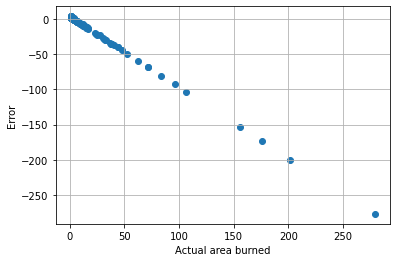

In [49]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a)-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   0.,   2.,   1.,   0.,   1.,   1.,   5.,   3.,
          3.,   4.,   2.,  15.,  27., 136.]),
 array([-276.71765019, -271.11001051, -265.50237084, -259.89473116,
        -254.28709148, -248.6794518 , -243.07181212, -237.46417244,
        -231.85653277, -226.24889309, -220.64125341, -215.03361373,
        -209.42597405, -203.81833438, -198.2106947 , -192.60305502,
        -186.99541534, -181.38777566, -175.78013599, -170.17249631,
        -164.56485663, -158.95721695, -153.34957727, -147.74193759,
        -142.13429792, -136.52665824, -130.91901856, -125.31137888,
        -119.7037392 , -114.09609953, -108.48845985, -102.88082017,
         -97.27318049,  -91.66554081,  -86.05790114,  -80.45026146,
         -74.84262178,  -69.2349821 ,  -63.627

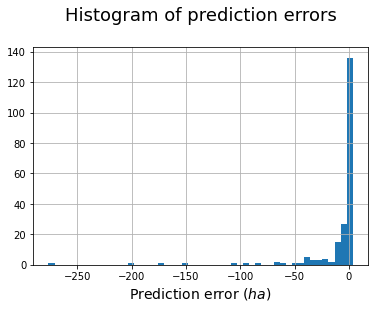

In [50]:
plt.title("Histogram of prediction errors\n",fontsize=18)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

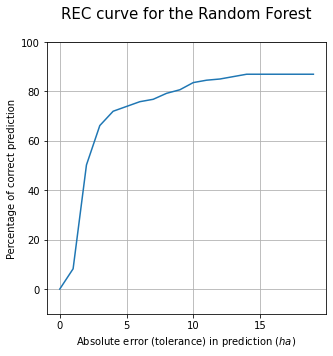

In [51]:
rec_RF=[]
for i in range(tol_max):
    rec_RF.append(rec(a,y_test,i))

plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize=15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_RF)

### **NEURAL NETWORK**

In [52]:
from keras.models import Sequential
import keras.optimizers as opti
from keras.layers import Dense, Activation,Dropout

Using TensorFlow backend.


In [53]:
model = Sequential()
model.add(Dense(100, input_dim=12))
model.add(Activation('selu'))
model.add(Dropout(0.3))
model.add(Dense(100))
model.add(Dropout(0.3))
model.add(Activation('selu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1300      
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)               

In [54]:
learning_rate=0.001
optimizer = opti.RMSprop(lr=learning_rate)
model.compile(optimizer=optimizer,loss='mse')

In [55]:
data=X_train
target = y_train
model.fit(data, target, epochs=100, batch_size=10,verbose=0)

**Prediction and RMSE**

In [56]:
a=model.predict(X_test)
print("RMSE for NN:",np.sqrt(np.mean((y_test-a.reshape(a.size,))**2)))

RMSE for NN: 0.6255961756726316


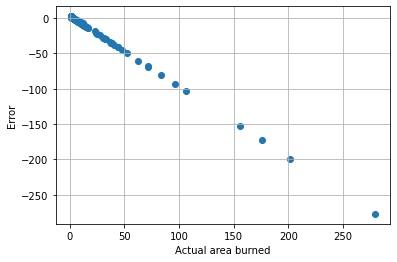

In [57]:
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10**(y_test),10**(a.reshape(a.size,))-10**(y_test))

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   1.,   0.,   2.,   1.,   0.,   1.,   1.,   3.,   4.,
          4.,   3.,   1.,  14.,  23., 143.]),
 array([-276.97842434, -271.38739925, -265.79637416, -260.20534907,
        -254.61432398, -249.02329889, -243.43227379, -237.8412487 ,
        -232.25022361, -226.65919852, -221.06817343, -215.47714834,
        -209.88612325, -204.29509816, -198.70407307, -193.11304798,
        -187.52202289, -181.9309978 , -176.33997271, -170.74894761,
        -165.15792252, -159.56689743, -153.97587234, -148.38484725,
        -142.79382216, -137.20279707, -131.61177198, -126.02074689,
        -120.4297218 , -114.83869671, -109.24767162, -103.65664652,
         -98.06562143,  -92.47459634,  -86.88357125,  -81.29254616,
         -75.70152107,  -70.11049598,  -64.519

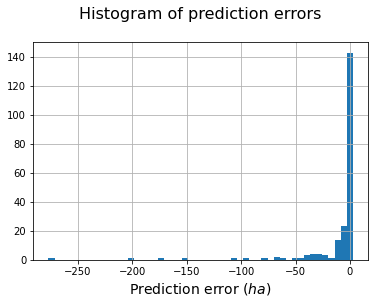

In [58]:
plt.title("Histogram of prediction errors\n",fontsize=16)
plt.xlabel("Prediction error ($ha$)",fontsize=14)
plt.grid(True)
plt.hist(10**(a.reshape(a.size,))-10**(y_test),bins=50)

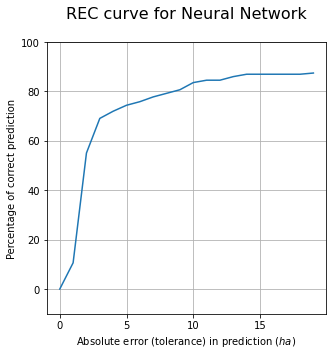

In [59]:
rec_NN=[]
for i in range(tol_max):
    rec_NN.append(rec(a,y_test,i))
plt.figure(figsize=(5,5))
plt.title("REC curve for Neural Network\n",fontsize=16)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0,tol_max+1,5)])
plt.ylim(-10,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_NN)

**Relative performance of Random Forest Regressor and Neural Networks(REC Curves)**

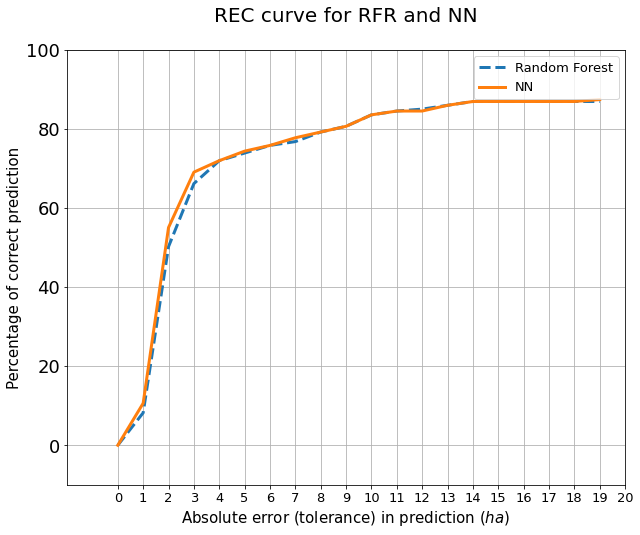

In [60]:
plt.figure(figsize=(10,8))
plt.title("REC curve for RFR and NN\n",fontsize=20)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)",fontsize=15)
plt.ylabel("Percentage of correct prediction",fontsize=15)
plt.xticks([i for i in range(0,tol_max+1,1)],fontsize=13)
plt.ylim(-10,100)
plt.xlim(-2,tol_max)
plt.yticks([i*20 for i in range(6)],fontsize=18)
plt.grid(True)
plt.plot(range(tol_max),rec_RF,'--',lw=3)
plt.plot(range(tol_max),rec_NN,'-',lw=3)
plt.legend(['Random Forest','NN'],fontsize=13)

### **LINEAR REGRESSION**

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
## Print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)

-0.05086798058566372
[ 1.74449208e-02  5.93487273e-03  2.75719627e-03  7.67933994e-04
  5.54743192e-05 -9.97652650e-03  1.84748363e-03 -2.16884070e-03
  3.51241162e-02  3.30469858e-02  7.52089015e-03  9.85275158e-03]


In [63]:
(1.74449208e-02 * 54.29) + (-0.05086798058566372)

0.8962167696463363

In [64]:
y_pred = lm.predict(X)  
y_pred

array([ 0.50557826,  0.46001527,  0.44558651,  0.3219269 ,  0.27158206,
        0.52957826,  0.50197583,  0.3381386 ,  0.65246761,  0.58976145,
        0.66906396,  0.42325735,  0.4599566 ,  0.51761182,  0.69214357,
        0.5693624 ,  0.50438361,  0.5706437 ,  0.49170854,  0.39055137,
        0.57036316,  0.4621742 ,  0.05646362,  0.57051842,  0.49560189,
        0.51069148,  0.6034448 ,  0.4809869 ,  0.60100744,  0.59993799,
        0.48078957,  0.56598604,  0.4545284 ,  0.5313777 ,  0.49057701,
        0.54941664,  0.58943755,  0.48169912,  0.55341174,  0.40066982,
        0.47231497,  0.51705945,  0.41350284,  0.4625678 ,  0.5109871 ,
        0.55523917,  0.48235461,  0.43256456,  0.33573103,  0.46691785,
        0.52076422,  0.41439744,  0.50190238,  0.50190238,  0.45945572,
        0.5440068 ,  0.52566861,  0.39498084,  0.37658534,  0.16059889,
        0.4139847 ,  0.37708504,  0.43706469,  0.39201038,  0.40559733,
        0.45425903,  0.45957251,  0.49357814,  0.52518984,  0.42

In [65]:
y==y_pred

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Name: Log-area, Length: 517, dtype: bool

In [66]:
## r2_value--> to check the model performance
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.027927989936573083